
 **Задание 1:**
Ответьте на вопрос: по какой категории товаров продано больше всего позиций?


**Задание 2:**
Оцените распределение количества проданных позиций в каждой товарной категории по подкатегориям. Проиллюстрируйте свой результат расчетной таблицей.


**Задание 3:**
Ответьте на вопрос: какой средний чек был 13.01.2022?


**Задание 4:**
Рассчитать долю товаров в категории "Сыры", которые продаются по промоакции. Построить pie chart


**Задание 5:**
 Рассчитать маржу по всем категориям
 Сделать расчет в рублях и в процентах
 Визуализировать результат с помощью 2 горизонтальных bar chart


**Задание 6:**
 Провести ABC-анализ по сумме продаж



---



 *Структура таблиц Таблица «products.xlsx» содержит столбцы:*

 product_id — id товара,
 level1 — категория
 товара,
 level2 — подкатегория товара,
 name — наименование товара.

*Таблица «orders.xlsx» содержит столбцы:*

 order_id — номер чека,
 accepted_at — дата и время чека,
 product_id — id товара,
 quantity — количество единиц товара в чеке,
 regular_price — регулярная цена,
 price — текущая цена,
 cost_price — закупочная цена.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
products = pd.read_excel('/content/products.xlsx')
products.head(1)

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...


In [5]:
orders = pd.read_excel('/content/orders.xlsx')
orders.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74


In [6]:
merged_df = products.merge(orders, on='product_id')
merged_df.head(2)

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14


**Задание 1:**
Ответьте на вопрос: по какой категории товаров продано больше всего позиций?

In [7]:
# По какой категории товаров продано больше всего позиций?
df = merged_df.groupby('level1').agg({'quantity': sum}).reset_index().sort_values('quantity', ascending=False)
df.head(1)

<ipython-input-7-204267913c3c>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = merged_df.groupby('level1').agg({'quantity': sum}).reset_index().sort_values('quantity', ascending=False)


,level1,quantity
1,Безалкогольные напитки,534


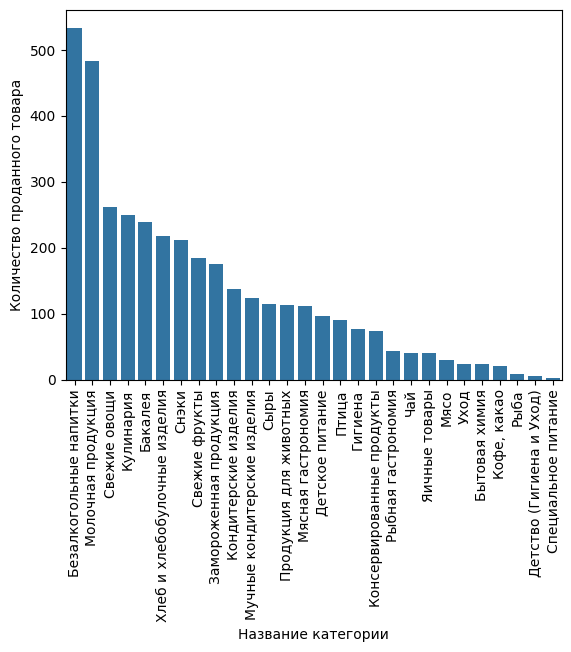

In [8]:
# Графическое отображение
plot = sns.barplot(x=df['level1'], y=df['quantity'])

plt.setp(plot.get_xticklabels(), rotation=90)

plot.set(xlabel='Название категории', ylabel='Количество проданного товара');

**Задание 2:**
Оцените распределение количества проданных позиций в каждой товарной категории  по подкатегориям. Проиллюстрируйте свой результат расчетной таблицей.


In [9]:
# Требуется оценить распределение количества проданных позиций в каждой товарной категории по подкатегориям
df = merged_df.groupby(['level1', 'level2']).agg({'quantity': sum}).reset_index().sort_values('quantity', ascending=False)
df

<ipython-input-9-82649c279e30>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = merged_df.groupby(['level1', 'level2']).agg({'quantity': sum}).reset_index().sort_values('quantity', ascending=False)


,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162
...,...,...,...
39,Кондитерские изделия,Пасты кондитерские,2
68,Мясная гастрономия,Субпродуктовые изделия,2
50,"Кофе, какао","Какао, горячий шоколад",2
17,Бытовая химия,Средства для сантехники,1


**Задание 3:**
Ответьте на вопрос: какой средний чек был 13.01.2022?

In [10]:
#Найти средний чек в заданную дату, чек 13.01.2022.
v = orders[orders['accepted_at'].dt.strftime('%Y-%m-%d') == '2022-01-13'].groupby('order_id')['price'].sum().reset_index()['price'].mean()
v.round(2)

798.04

**Задание 4:**
Рассчитать долю товаров в категории "Сыры", которые продаются по промоакции. Построить pie chart

In [11]:
# Рассчитать долю товаров, которая продается в категории Сыры
# Визуализировать результат

#  Сортировка по категории "Сыры"
df = merged_df[merged_df['level1'] == 'Сыры']
# Определение акционный товар или нет (столбец is_promo)
df['is_promo'] = (df['regular_price'] > df['price'])
df.head(5)

<ipython-input-11-5bf1c610b2e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_promo'] = (df['regular_price'] > df['price'])


,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price,is_promo
116,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517510145,2022-01-13 19:22:00,2,129,129,73,False
117,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517609703,2022-01-13 08:46:56,1,116,116,73,False
118,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517675616,2022-01-13 18:23:57,1,129,129,73,False
119,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517521855,2022-01-13 19:57:03,1,129,129,73,False
265,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517668073,2022-01-13 22:43:39,1,199,159,110,True


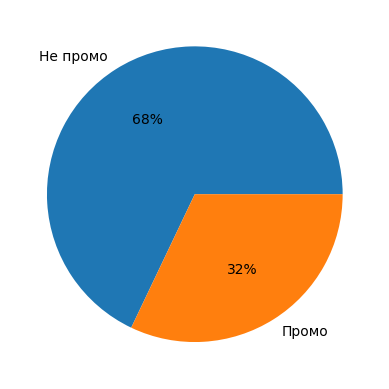

In [12]:
# Визуализация полученных результатов
df[df['is_promo'] == True]['is_promo'].count() / df['is_promo'].count()

m = {
    True: 'Промо',
    False: 'Не промо'
}

df = df.groupby('is_promo')['level1'].count().reset_index()
df['is_promo'] = df['is_promo'].map(m)
df

plt.pie(df['level1'], labels=df['is_promo'], autopct='%.0f%%');

**Задание 5:**
 Рассчитать маржу по всем категориям
 Сделать расчет в рублях и в процентах
 Визуализировать результат с помощью 2 горизонтальных bar chart

In [13]:
# Рассчитать маржу по категориям level1

def calc_margin(x):
    d = {}
    d['margin_rub'] = sum(x['price']) - sum(x['cost_price'])
    d['margin_perc'] = d['margin_rub'] / sum(x['price'])
    return pd.Series(d, index=['margin_rub', 'margin_perc'])

merged_df.head(2)

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14


In [14]:
#  Группировка и расчет маржинальности в рублях и процентах
df = merged_df.groupby('level1').apply(calc_margin).reset_index()
df

,level1,margin_rub,margin_perc
0,Бакалея,7224.0,0.383663
1,Безалкогольные напитки,15163.0,0.443103
2,Бытовая химия,1420.0,0.261270
3,Гигиена,2704.0,0.293466
4,Детское питание,1272.0,0.370306
5,Детство (Гигиена и Уход),517.0,0.299017
6,Замороженная продукция,11057.0,0.474244
7,Кондитерские изделия,4910.0,0.423130
8,Консервированные продукты,3635.0,0.420328
9,"Кофе, какао",3529.0,0.509382


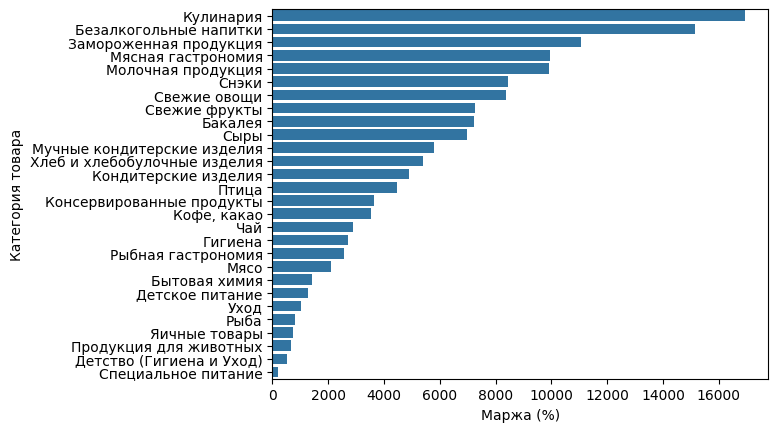

In [15]:
# Визуализация полученных результатов
df_plot = df.sort_values('margin_rub', ascending=False)

plot = sns.barplot(data=df_plot, y='level1', x='margin_rub', orient='h')
plot.set(xlabel='Маржа (руб)', ylabel='Категория товара')

df_plot = df.sort_values('margin_perc', ascending=False)

plot = sns.barplot(data=df_plot, y='level1', x='margin_perc', orient='h')
plot.set(xlabel='Маржа (%)', ylabel='Категория товара');

**Задание 6:**
 Провести ABC-анализ по сумме продаж

In [16]:
# Проведение ABC анализа
merged_df.head()

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14
2,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517368853,2022-01-13 09:34:18,1,18,18,14
3,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517676281,2022-01-13 08:21:53,2,18,18,14
4,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517600286,2022-01-13 14:32:24,4,18,18,14


In [17]:
# Расчет суммы продаж
df = merged_df.groupby('level2').agg({'price': sum}).reset_index()
#  Сортировка итоговой суммы продаж
df = df.sort_values('price', ascending=False)
df

<ipython-input-17-99d3f281e3e4>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = merged_df.groupby('level2').agg({'price': sum}).reset_index()


,level2,price
10,Готовые блюда,36944
50,Мясо птицы охлажденное,19402
51,Напитки,18320
85,"Тепличные овощи, грибы",17782
94,"Цитрусовые, семечковые и прочие плоды",16038
...,...,...
35,Кофе для капсульных машин,235
91,Уход за одеждой и обувью,192
57,Первая помощь,168
87,Товары для собак,150


In [18]:
# Вычисляю процент от общего объема продаж по категориям
df['price_contribution'] = df['price'] / sum(df['price'])
df = df.sort_values('price_contribution' , ascending =False)
df

,level2,price,price_contribution
10,Готовые блюда,36944,0.095100
50,Мясо птицы охлажденное,19402,0.049944
51,Напитки,18320,0.047159
85,"Тепличные овощи, грибы",17782,0.045774
94,"Цитрусовые, семечковые и прочие плоды",16038,0.041284
...,...,...,...
35,Кофе для капсульных машин,235,0.000605
91,Уход за одеждой и обувью,192,0.000494
57,Первая помощь,168,0.000432
87,Товары для собак,150,0.000386


In [19]:
# Вычисляю совокупный процент по каждой категории товаров
df['price_cumsum'] = df['price_contribution'].cumsum()
df

,level2,price,price_contribution,price_cumsum
10,Готовые блюда,36944,0.095100,0.095100
50,Мясо птицы охлажденное,19402,0.049944,0.145044
51,Напитки,18320,0.047159,0.192202
85,"Тепличные овощи, грибы",17782,0.045774,0.237976
94,"Цитрусовые, семечковые и прочие плоды",16038,0.041284,0.279260
...,...,...,...,...
35,Кофе для капсульных машин,235,0.000605,0.998494
91,Уход за одеждой и обувью,192,0.000494,0.998988
57,Первая помощь,168,0.000432,0.999421
87,Товары для собак,150,0.000386,0.999807


In [20]:
# Обозначаю принадлежность к группам
def set_abc(x):
    if x < 0.8:
        return 'A'
    elif x < 0.95:
        return 'B'
    else:
        return 'C'

df['ABC_price'] = df['price_cumsum'].apply(set_abc)
df

,level2,price,price_contribution,price_cumsum,ABC_price
10,Готовые блюда,36944,0.095100,0.095100,A
50,Мясо птицы охлажденное,19402,0.049944,0.145044,A
51,Напитки,18320,0.047159,0.192202,A
85,"Тепличные овощи, грибы",17782,0.045774,0.237976,A
94,"Цитрусовые, семечковые и прочие плоды",16038,0.041284,0.279260,A
...,...,...,...,...,...
35,Кофе для капсульных машин,235,0.000605,0.998494,C
91,Уход за одеждой и обувью,192,0.000494,0.998988,C
57,Первая помощь,168,0.000432,0.999421,C
87,Товары для собак,150,0.000386,0.999807,C


In [21]:
#  до 80 % дохода приносят - 31 категория
#  80 - 95 % - 29 категория
#  95 - 100 %  - 40 категория
df.groupby('ABC_price')['level2'].count()

,level2
ABC_price,
A,31
B,29
C,40


In [22]:
#  Категории приносящие до 80 % дохода
df[df['ABC_price'] == 'A']['level2']

,level2
10,Готовые блюда
50,Мясо птицы охлажденное
51,Напитки
85,"Тепличные овощи, грибы"
94,"Цитрусовые, семечковые и прочие плоды"
72,Снэки соленые
33,"Корнеплоды, зелень и прочие овощи"
18,Замороженные полуфабрикаты
92,Хлеб и хлебобулочные изделия
27,Колбасы
